<a href="https://colab.research.google.com/github/reemaranisahoo1996/Transportation-Data-Analysis/blob/main/California_Childhood_poverty_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Data-Children-in-Poverty.xlsx')

In [ ]:
df

,Indicator Name,Geography,Year,Category,Subcategory,Numerator,Denominator,Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit
0,Children in Poverty,United States,2010,Total Population,Total population,13980497,72850300,19.2,19.2,19.2
1,Children in Poverty,California,2010,Total Population,Total population,1748267,9173776,19.1,19,19.1
2,Children in Poverty,California,2010,Age,0-5 years,612940,2990290,20.5,20.5,20.5
3,Children in Poverty,California,2010,Age,6-11 years,560699,2952778,19,18.9,19
4,Children in Poverty,California,2010,Age,12-17 years,574628,3230708,17.8,17.7,17.8
...,...,...,...,...,...,...,...,...,...,...
9919,Children in Poverty,Yuba,2021,Race-Ethnicity,Asian,554,1757,31.5,29.4,33.7
9920,Children in Poverty,Yuba,2021,Race-Ethnicity,Pacific Islander,NaN,33,NaN,NaN,NaN
9921,Children in Poverty,Yuba,2021,Race-Ethnicity,Multi-Race,953,3732,25.5,24.2,27
9922,Children in Poverty,Yuba,2021,Race-Ethnicity,Hispanic,2386,8526,28,27,28.9


In [ ]:
df['Category'].unique()

array(['Total Population ', 'Total Population', 'Age', 'Sex',
       'Race-Ethnicity'], dtype=object)

In [ ]:
df['Category'] = df['Category'].str.strip()

In [ ]:
df['Subcategory'] = df['Subcategory'].str.strip()

In [ ]:
df['Subcategory'].unique()

array(['Total population', '0-5 years', '6-11 years', '12-17 years',
       '0-17 years', 'Female', 'Male', 'AIAN', 'Asian', 'Black',
       'Hispanic', 'Multi-Race', 'Pacific Islander', 'White'],
      dtype=object)

In [ ]:
df['Numerator'].fillna(0)

0       13980497
1        1748267
2         612940
3         560699
4         574628
          ...   
9919         554
9920           0
9921         953
9922        2386
9923         712
Name: Numerator, Length: 9924, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Indicator Name              9924 non-null   object
 1   Geography                   9924 non-null   object
 2   Year                        9924 non-null   int64 
 3   Category                    9924 non-null   object
 4   Subcategory                 9924 non-null   object
 5   Numerator                   9765 non-null   object
 6   Denominator                 9924 non-null   int64 
 7   Percent                     9769 non-null   object
 8   Lower 95% Confidence Limit  9769 non-null   object
 9   Upper 95% Confidence Limit  9769 non-null   object
dtypes: int64(2), object(8)
memory usage: 775.4+ KB


In [ ]:
df.dropna()

,Indicator Name,Geography,Year,Category,Subcategory,Numerator,Denominator,Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit
0,Children in Poverty,United States,2010,Total Population,Total population,13980497,72850300,19.2,19.2,19.2
1,Children in Poverty,California,2010,Total Population,Total population,1748267,9173776,19.1,19,19.1
2,Children in Poverty,California,2010,Age,0-5 years,612940,2990290,20.5,20.5,20.5
3,Children in Poverty,California,2010,Age,6-11 years,560699,2952778,19,18.9,19
4,Children in Poverty,California,2010,Age,12-17 years,574628,3230708,17.8,17.7,17.8
...,...,...,...,...,...,...,...,...,...,...
9918,Children in Poverty,Yuba,2021,Race-Ethnicity,AIAN,83,384,21.6,17.8,26
9919,Children in Poverty,Yuba,2021,Race-Ethnicity,Asian,554,1757,31.5,29.4,33.7
9921,Children in Poverty,Yuba,2021,Race-Ethnicity,Multi-Race,953,3732,25.5,24.2,27
9922,Children in Poverty,Yuba,2021,Race-Ethnicity,Hispanic,2386,8526,28,27,28.9


In [ ]:
df[(df['Category']=='Race-Ethnicity') & (df['Subcategory']=='Asian')]

,Indicator Name,Geography,Year,Category,Subcategory,Numerator,Denominator,Percent,Lower 95% Confidence Limit,Upper 95% Confidence Limit
9,Children in Poverty,California,2010,Race-Ethnicity,Asian,112327,982143,11,11.4,11.5
23,Children in Poverty,Alameda,2010,Race-Ethnicity,Asian,7109,83557,8,8.3,8.7
37,Children in Poverty,Alpine,2010,Race-Ethnicity,Asian,0,24,0,,
51,Children in Poverty,Amador,2010,Race-Ethnicity,Asian,0,0,0,,
65,Children in Poverty,Butte,2010,Race-Ethnicity,Asian,1297,2710,47,46,49.7
...,...,...,...,...,...,...,...,...,...,...
9863,Children in Poverty,Tulare,2021,Race-Ethnicity,Asian,656,4800,13,12.7,14.7
9877,Children in Poverty,Tuolumne,2021,Race-Ethnicity,Asian,0,104,0,NaN,NaN
9891,Children in Poverty,Ventura,2021,Race-Ethnicity,Asian,468,10680,4,4,4.8
9905,Children in Poverty,Yolo,2021,Race-Ethnicity,Asian,882,4082,21,20.4,22.9


<Axes: xlabel='Year'>

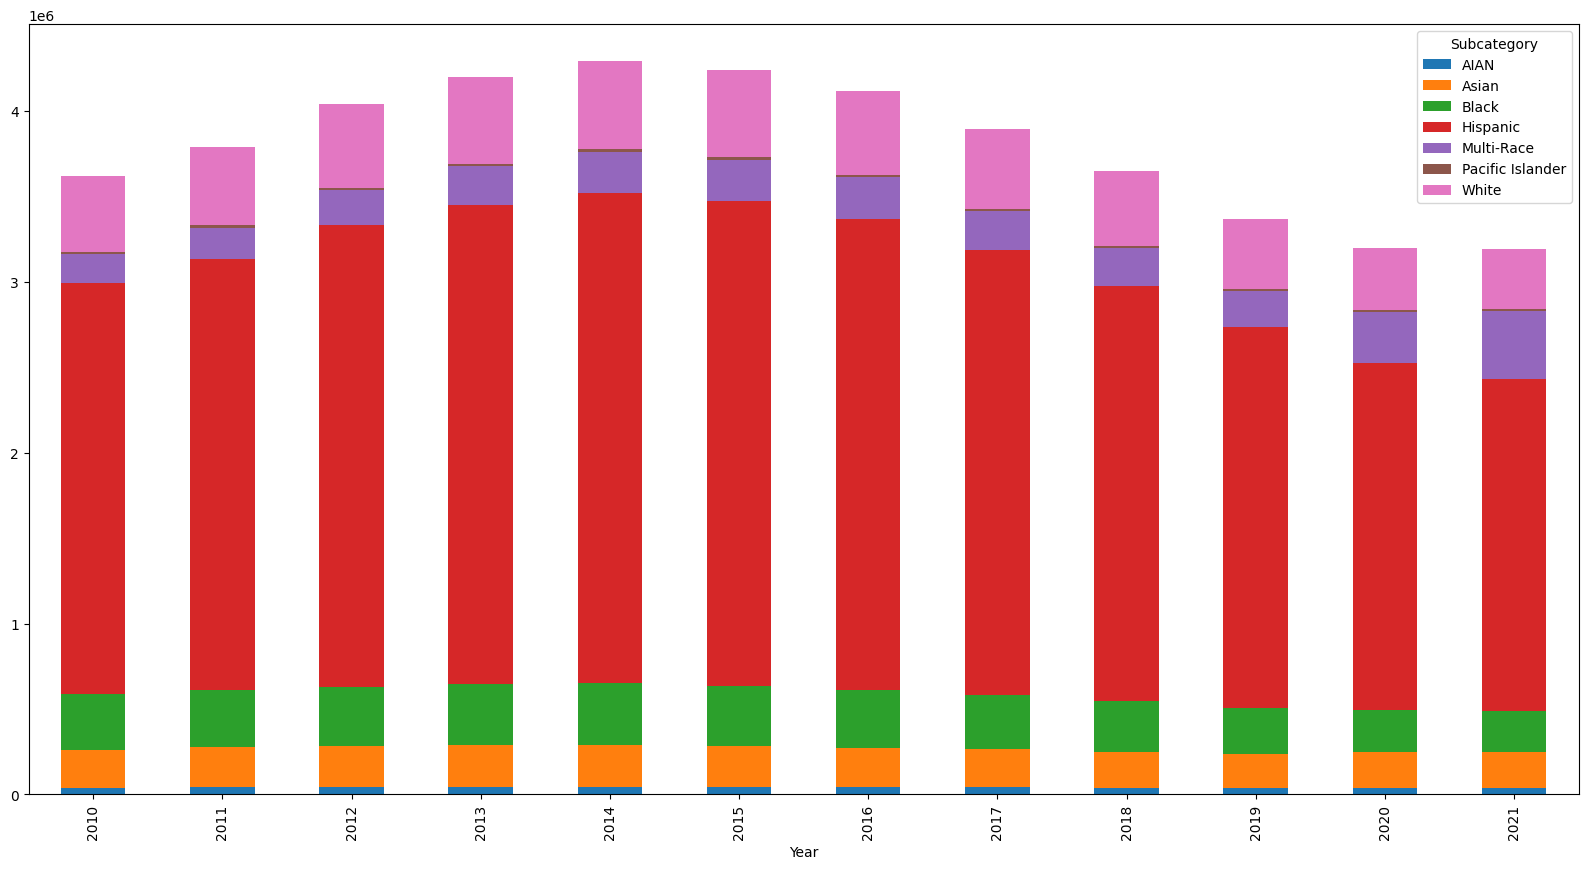

In [ ]:
filter=df[(df['Category']=='Race-Ethnicity')]
filter.groupby(['Year', 'Subcategory'])['Numerator'].sum().unstack(fill_value=0).plot.bar(stacked=True, figsize=(20,10))

<Axes: xlabel='Year'>

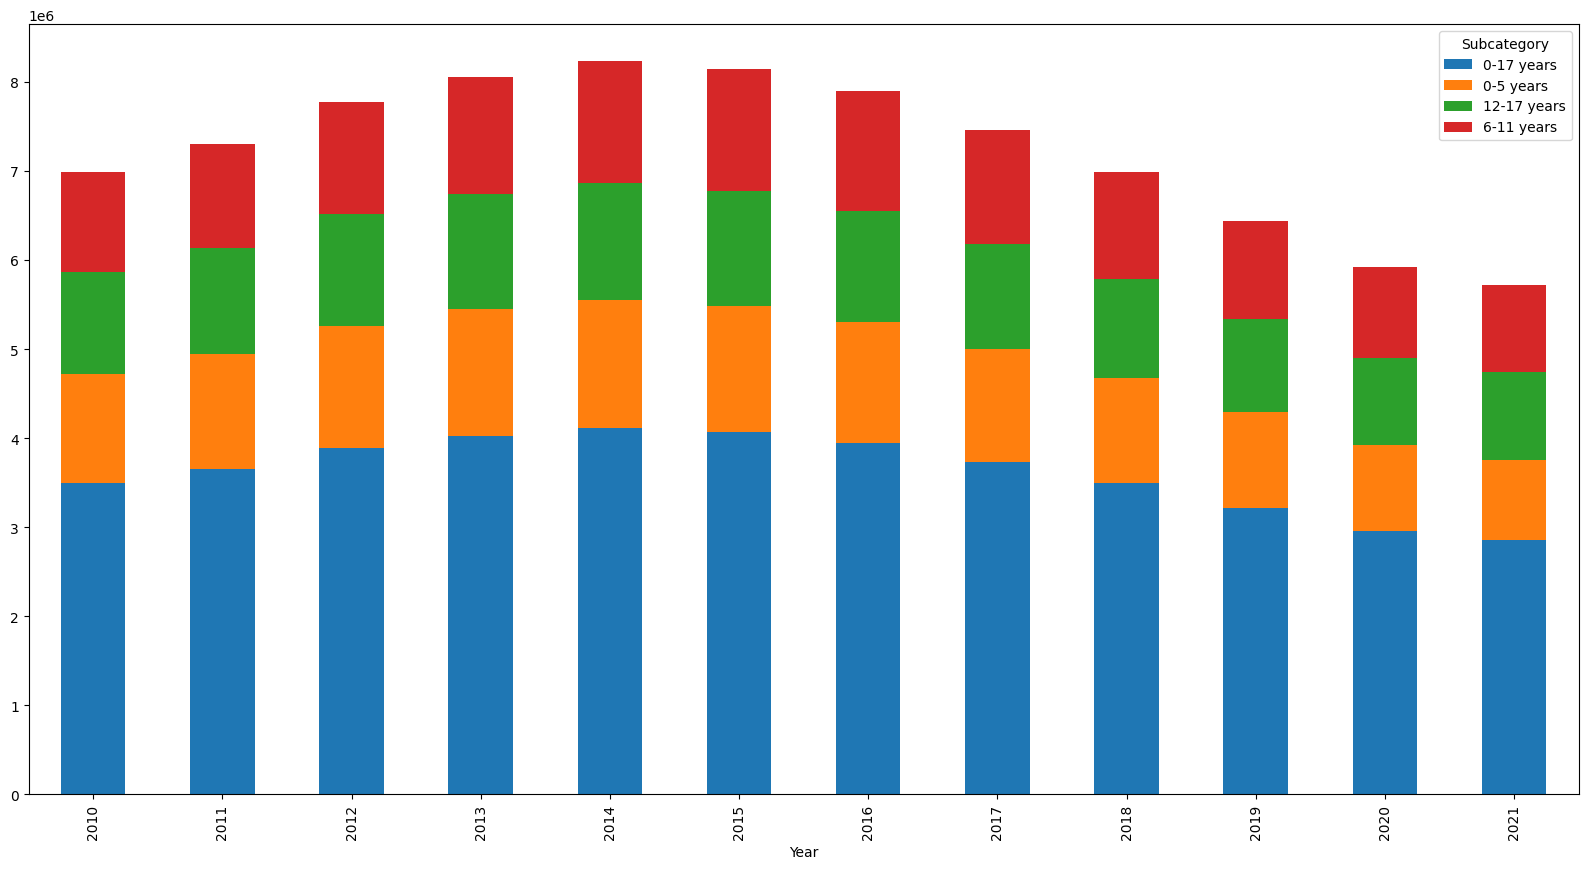

In [ ]:
filter=df[(df['Category']=='Age')]
filter.groupby(['Year', 'Subcategory'])['Numerator'].sum().unstack(fill_value=0).plot.bar(stacked=True, figsize=(20,10))

<Axes: xlabel='Year'>

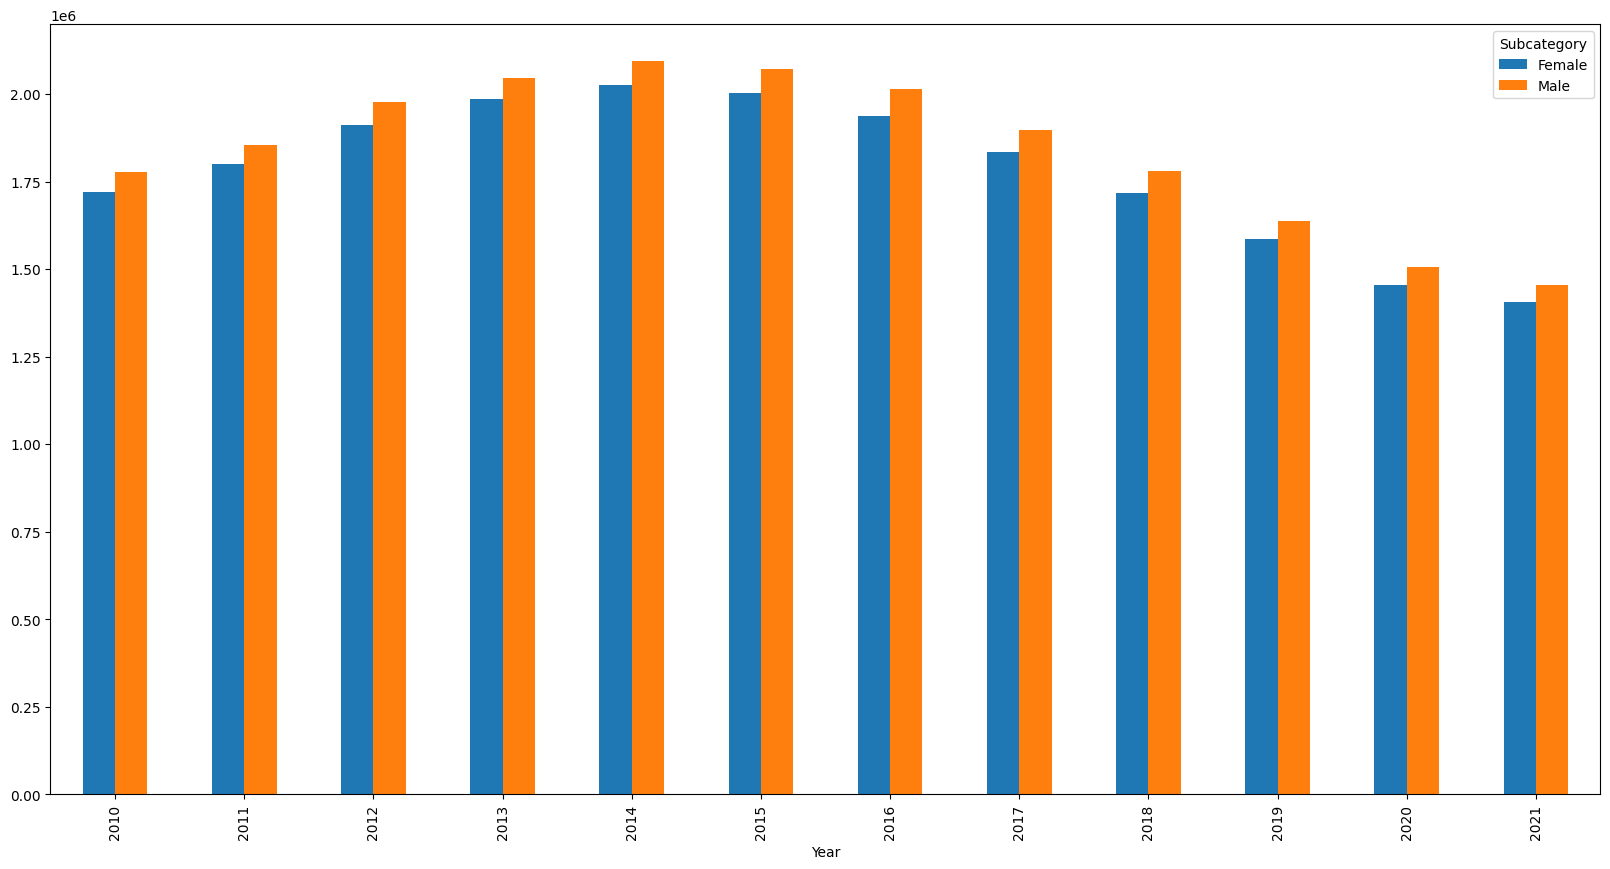

In [ ]:
filter=df[(df['Category']=='Sex')]
filter.groupby(['Year', 'Subcategory'])['Numerator'].sum().unstack(fill_value=0).plot.bar( figsize=(20,10))

In [ ]:
df['Numerator'] = pd.to_numeric(df['Numerator'], errors='coerce').fillna(0).astype(int)

<Axes: xlabel='Year'>

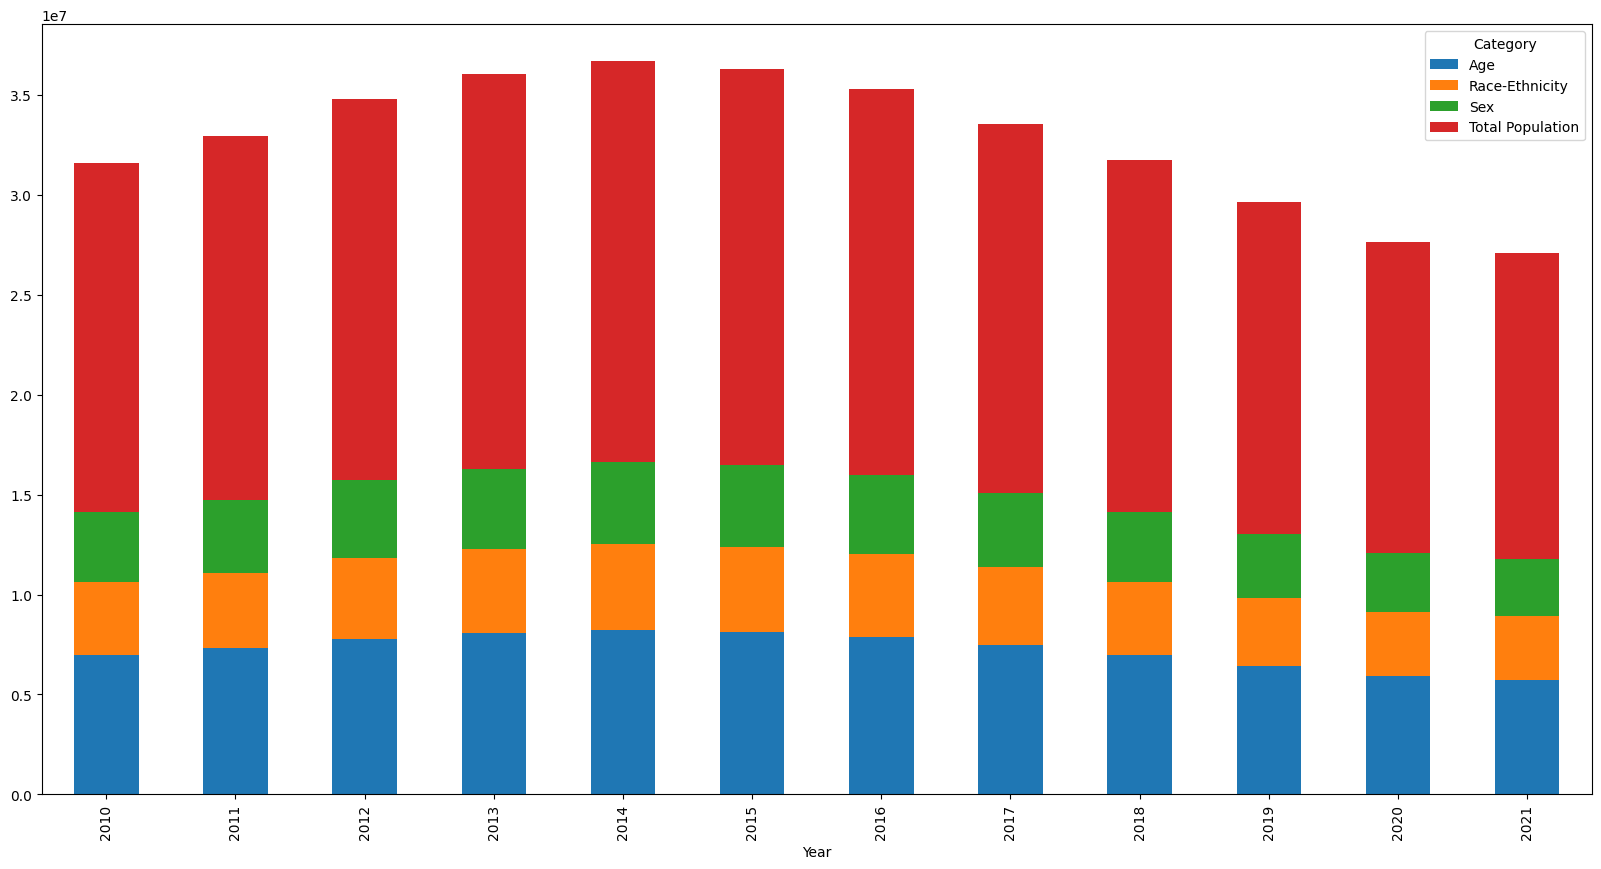

In [ ]:
df.groupby(['Year', 'Category'])['Numerator'].sum().unstack(fill_value=0).plot.bar(stacked=True, figsize=(20,10))

In [ ]:
df['Numerator'].dtype

dtype('int64')

In [ ]:
df['Geography'].unique()

array(['United States', 'California', 'Alameda', 'Alpine', 'Amador',
       'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte',
       'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo',
       'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera',
       'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus',
       'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura',
       'Yolo', 'Yuba', 'United States\n', 'Alameda ', 'Alpine ',
       'Amador ', 'Butte ', 'Calaveras ', 'Contra Costa ', 'Del Norte ',
       'El Dorado ', 'Imperial ', 'Kings ', 'Lake ', 'Lassen ',
       'Los Angeles ', 'Madera ', 'Marin 

In [ ]:
filter=df[(df['Geography']=='California')& (df['Category']=='Race-Ethnicity')]

In [ ]:
df['Category'][(df['Geography']=='California')].unique()

array(['Total Population', 'Age', 'Sex', 'Race-Ethnicity'], dtype=object)

<Axes: xlabel='Year'>

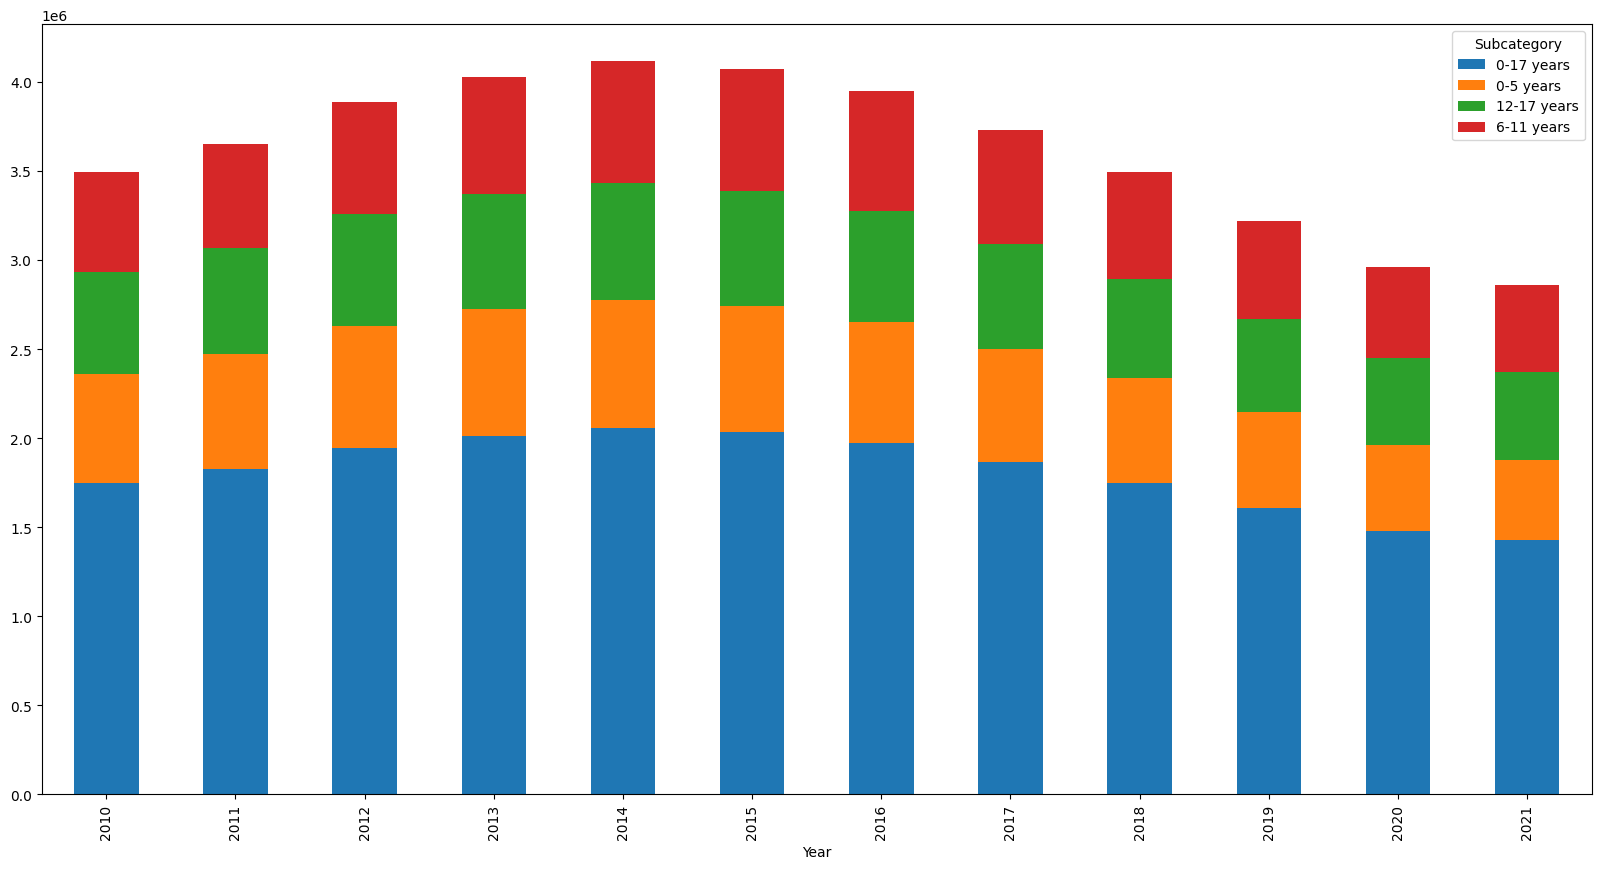

In [ ]:
filter=df[(df['Geography']=='California')& (df['Category']=='Age')]
filter.groupby(['Year', 'Subcategory'])['Numerator'].sum().unstack(fill_value=0).plot.bar(stacked=True, figsize=(20,10))

<Axes: xlabel='Year'>

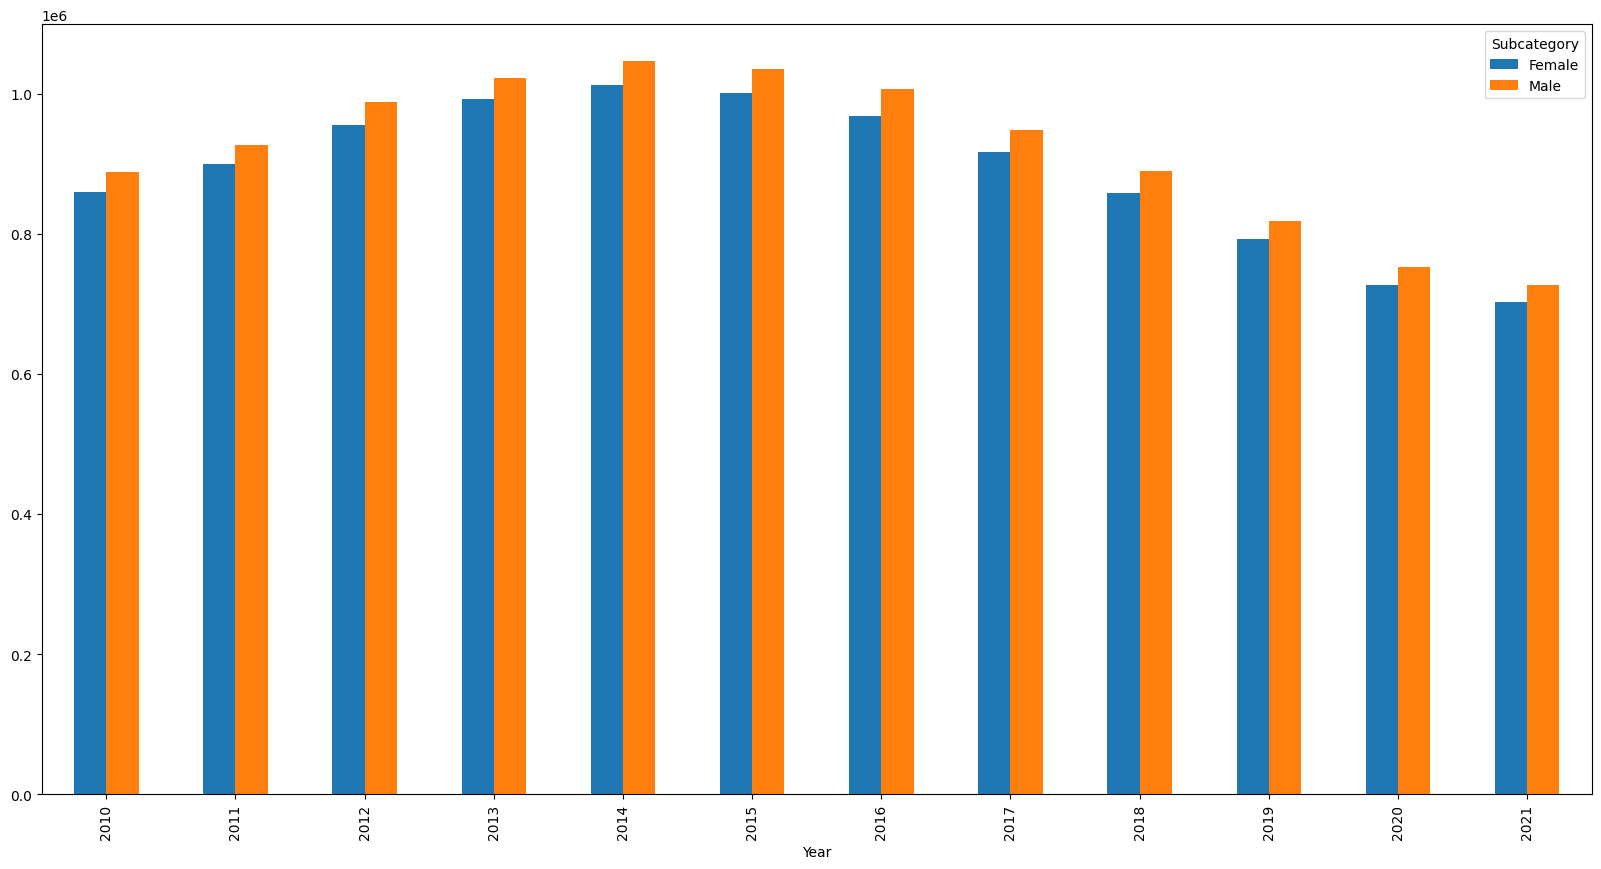

In [ ]:
filter=df[(df['Geography']=='California')& (df['Category']=='Sex')]
filter.groupby(['Year', 'Subcategory'])['Numerator'].sum().unstack(fill_value=0).plot.bar(figsize=(20,10))

<Axes: xlabel='Year'>

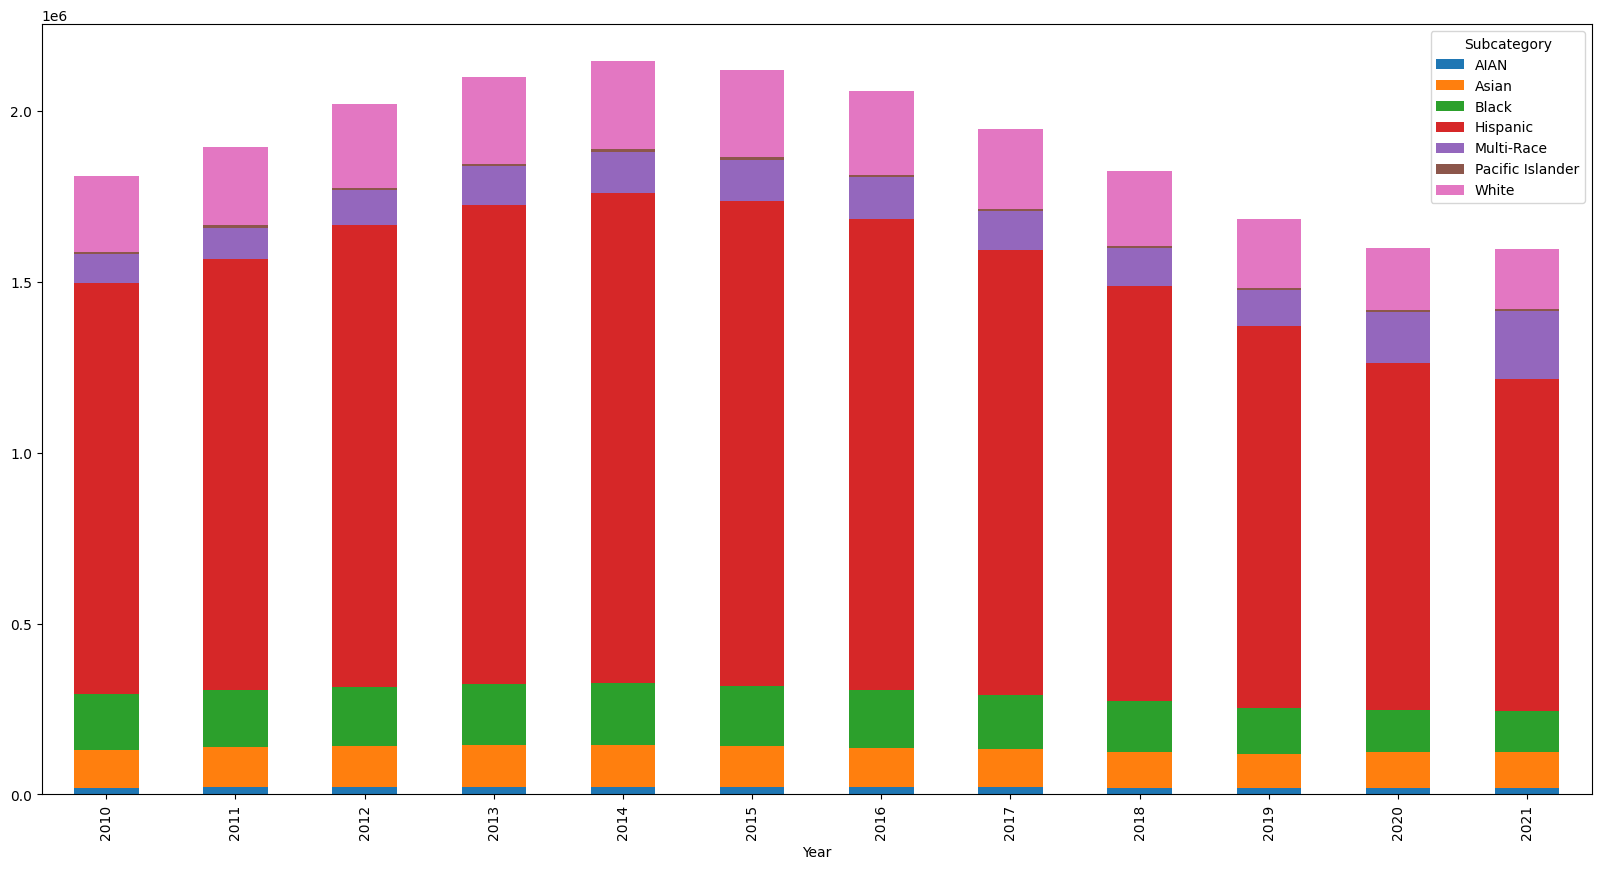

In [ ]:
filter
filter.groupby(['Year', 'Subcategory'])['Numerator'].sum().unstack(fill_value=0).plot.bar(stacked=True, figsize=(20,10))

In [ ]:
filter=df[(df['Geography']=='United States') & (df['Category']=='Race-Ethnicity')]
filter.groupby(['Year', 'Subcategory'])['Numerator'].sum().unstack(fill_value=0).plot.bar( figsize=(20,10))

TypeError: ignored

In [ ]:
df.groupby('Geography')

In [ ]:
df.groupby('Geography')['Numerator'].sum().unstack(fill_value=0).plot.line(stacked=True, figsize=(20,10))

ValueError: ignored

In [ ]:
df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce').fillna(0).astype(int)

<Axes: xlabel='Year'>

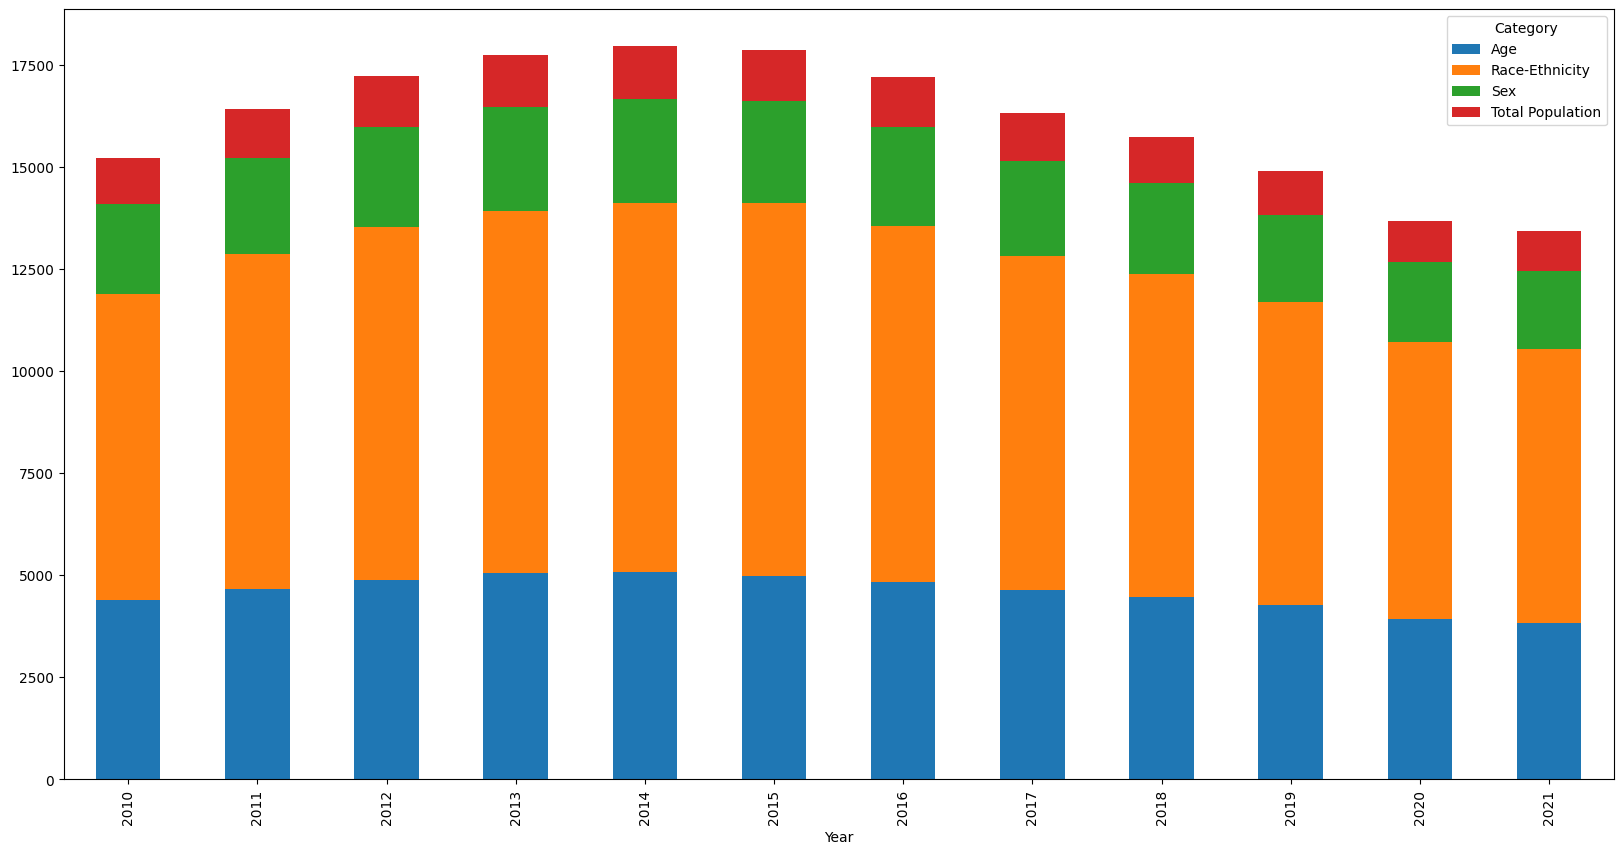

In [ ]:
df.groupby(['Year', 'Category'])['Percent'].sum().unstack(fill_value=0).plot.bar(stacked=True, figsize=(20,10))